# Using HZV029 SRM1950 subset to illustrate detection and annotation



In [1]:
import os
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
infile = 'srm1950hzvhpos_asari_project_1016164030/export/full_Feature_table.tsv'
detection_counts = pd.read_csv(infile, usecols=['id_number', 'peak_area', 'detection_counts'], sep='\t')
detection_counts.sort_values(by='detection_counts', ascending=False, inplace=True)
detection_counts.head(10)

,id_number,peak_area,detection_counts
8210,F8211,10808176,17
2961,F2962,32225013,17
2868,F2869,160345166,17
2869,F2870,119992254,17
2870,F2871,26428257,17
5183,F5184,929519655,17
5184,F5185,183549894,17
9845,F9846,310459630,17
6918,F6919,73774507,17
6917,F6918,4049236,17


In [3]:
len(detection_counts[detection_counts['detection_counts'] == 17]), len(
    detection_counts[detection_counts['detection_counts'] == 16]), len(
        detection_counts[detection_counts['detection_counts'] == 15])


(983, 684, 1689)

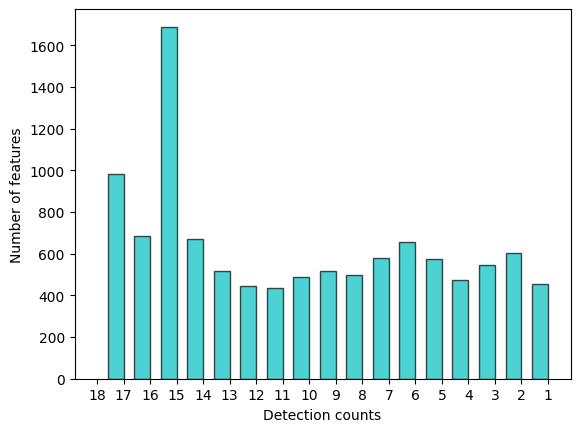

In [4]:
fig, ax = plt.subplots()
ax.hist(detection_counts['detection_counts']+0.1, bins=range(1, 19), width=.6, color='c', edgecolor='k', alpha=0.7)
ax.invert_xaxis()
ax.set_xticks(range(1, 19))
ax.set_xlabel('Detection counts')
ax.set_ylabel('Number of features')
plt.show()

In [5]:
14/17.0

0.8235294117647058

In [6]:
alldata = pd.read_csv(infile, index_col=0, sep='\t')
alldata.head(3)

,mz,rtime,rtime_left_base,rtime_right_base,parent_masstrack_id,peak_area,cSelectivity,goodness_fitting,snr,detection_counts,...,batch17_HILICpos_MT_20210811_005,batch1_HILICpos_MT_20210726_013,batch2_HILICpos_MT_20210727_005,batch3_HILICpos_MT_20210728_005,batch4_HILICpos_MT_20210729_005,batch5_HILICpos_MT_20210730_005,batch6_HILICpos_MT_20210731_005,batch7_HILICpos_MT_20210801_005,batch8_HILICpos_MT_20210802_005,batch9_HILICpos_MT_20210803_005
id_number,,,,,,,,,,,,,,,,,,,,,
F1,80.168,31.02,28.34,32.57,1,4445459,0.49,0.76,2,9,...,166752,680223,683629,786037,0,315092,522047,633831,0,0
F2,80.168,32.96,32.57,36.04,1,3616292,0.50,0.68,2,9,...,122129,578480,573154,711308,0,263716,408970,500590,0,0
F3,80.168,41.06,37.58,45.67,1,7984741,0.49,0.89,3,9,...,304651,1308367,1332489,1445234,0,519572,888625,1066954,0,0


In [7]:
alldata.columns[9: 20]

Index(['detection_counts', 'batch13_HILICpos_MT_20210807_005',
       'batch10_HILICpos_MT_20210804_005', 'batch11_HILICpos_MT_20210805_005',
       'batch12_HILICpos_MT_20210806_005', 'batch14_HILICpos_MT_20210808_005',
       'batch15_HILICpos_MT_20210809_005', 'batch16_HILICpos_MT_20210810_005',
       'batch17_HILICpos_MT_20210811_005', 'batch1_HILICpos_MT_20210726_013',
       'batch2_HILICpos_MT_20210727_005'],
      dtype='object')

In [8]:
# Do proper plot of detection counts and intensity
dict_all = {}
for idx, row in alldata.iterrows():
    ave_intensity = row.values[10:].sum() / row['detection_counts'] if row['detection_counts'] > 0 else 0
    dict_all[idx] = (int(row['detection_counts']), ave_intensity)

In [9]:
dict_all['F1']

(9, 504886.8888888889)

In [10]:
# Excel sanity check
4543/9

504.77777777777777

In [11]:
bins = list(range(1, 18))
bins.reverse()
tally = {}
for x in bins:
    tally[x] = []

for idx, (detection_count, average_intensity) in dict_all.items():
    if detection_count > 0: # one outlier with 0 detection count
        tally[detection_count].append(average_intensity)

yy1, yy2 = [len(tally[x]) for x in bins], [np.mean(tally[x]) for x in bins]

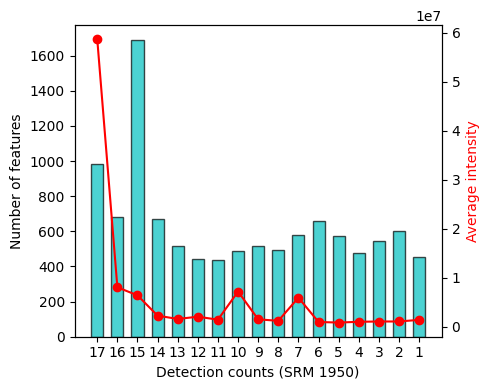

In [12]:
fig, ax1 = plt.subplots(figsize=(5, 4))
ax2 = ax1.twinx()
ax1.bar(bins, yy1, color='c', alpha=0.7, edgecolor='k', width=0.6)
ax2.plot(bins, yy2, color='r', marker='o')
ax1.invert_xaxis()
ax1.set_xticks(bins)
ax1.set_xlabel('Detection counts (SRM 1950)')
ax1.set_ylabel('Number of features', color='k')
ax2.set_ylabel('Average intensity', color='r')
plt.tight_layout()
plt.savefig('detection_counts_vs_average_intensity_srm1950hzv.pdf', dpi=300)

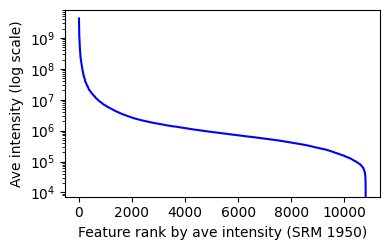

In [13]:
all_intensities = [average_intensity for (detection_count, average_intensity) in dict_all.values()]
all_intensities.sort(reverse=True)
plt.figure(figsize=(4, 2.6))
plt.plot(range(1, len(all_intensities)+1), all_intensities, color='b')
plt.yscale('log')
plt.xlabel('Feature rank by ave intensity (SRM 1950)')
plt.ylabel('Ave intensity (log scale)')
plt.tight_layout()
plt.savefig('feature_rank_vs_average_intensity_srm1950hzv.pdf', dpi=300)    

In [14]:
len(tally[17]), alldata.shape, len(tally[17]) / alldata.shape[0]

(983, (10811, 27), 0.09092590879659605)

In [15]:
np.mean(tally[17]), np.median(tally[17]), min(tally[17]), max(tally[17])

(58617733.476033755, 2995600.0, 19339.941176470587, 4279340540.5882354)

## Anno

In [44]:
from mass2chem.search import (build_centurion_tree,
                        find_all_matches_centurion_indexed_list)
from asari.mass_functions import complete_mass_paired_mapping
from asari.tools import match_features as mf

In [17]:
# CSM utils modules
import sys
# same files from GitHub repo, https://github.com/shuzhao-li-lab/consensus_serum_metabolome/tree/main/utils
sys.path.append("/Users/lish/li.github/consensus_serum_metabolome/utils")
from mining import *
from csm_align import *
from khipu_custom import *

In [18]:
# CSM database files, download from https://github.com/shuzhao-li-lab/consensus_serum_metabolome/releases/download/v1.6.2/r1_libs_1.6.2.zip
# place the files under this directory
DBFILES_DIR = '/Users/lish/li.proj/NIST_collaborative/DB_REF_CSM/'

# Load CSM data
BMDB = json.load(open(DBFILES_DIR + 'blood_metabolites_20250212.json'))
bmDict = {}
for x in BMDB: bmDict[x['id']] = x

neuCSM = json.load(open(DBFILES_DIR + 'r1_neu_mass_registries_annotated_1012.json'))
lib_hilicpos = json.load(open(DBFILES_DIR + 'r1_ref_hilic_pos_csmfs_20250304.json'))
lib_rppos = json.load(open(DBFILES_DIR + 'r1_ref_rp_pos_csmfs_20250304.json'))
lib_hilicneg = json.load(open(DBFILES_DIR + 'r1_ref_hilic_neg_csmfs_20250304.json'))
lib_rpneg = json.load(open(DBFILES_DIR + 'r1_ref_rp_neg_csmfs_20250304.json'))

# load Wishart lab annotation on SRM 1950
# This is agreement btw CSM and Wishart data; 706 out HMDB 922 entries
srm_hmdb_subset706 = json.load(open(DBFILES_DIR + 'Wishart2025_SRM1950_bmDBoverlap706.json'))

In [19]:
# Batch processing functions
primary_ions = primary_ions_neg.union(primary_ions_pos)
KCD_formula_coordinate = build_KCD_from_formula_coordinate(formula_coordinate)
csmlib_dict = {
    'hilicpos': lib_hilicpos,
    'rppos': lib_rppos,
    'hilicneg': lib_hilicneg,
    'rpneg': lib_rpneg
}

def annotate3_asari_table_by_csm(
                        asari_table, 
                        KCD_formula_coordinate, 
                        isotope_search_patterns,
                        adduct_search_patterns_pos,
                        extended_adducts,
                        mode = 'pos', method='rppos',
                        mz_tolerance_ppm=5, rt_tolerance=2,
                        bmDict=bmDict,
                        reflib=lib_rppos, 
                        neuDict=neuCSM,
                        outfile='csmf_anno__.tsv', 
                        sep='\t',
                        quality_filter=True
                        ):
    epdlist, list_features_ = run_khipu_insitu(asari_table,
                                KCD_formula_coordinate, 
                                isotope_search_patterns,
                                adduct_search_patterns_pos,
                                extended_adducts,
                                mode = mode,
                                mz_tolerance_ppm=mz_tolerance_ppm, 
                                rt_tolerance=rt_tolerance,)
    clean_dict_match, featureDict = csmf_annotate_from_epd_list(
            epdlist, reflib=reflib, 
            )
    anno, header = export_csmf_annotation(clean_dict_match, featureDict, bmDict=bmDict,
                                        reflib=reflib, 
                                        neuDict=neuDict,
                                        )
    # keep quality features only
    if quality_filter:
            new = {}
            for k,v in anno.items():
                    if v['ion_csm'] in primary_ions:
                            new[k] = v
            anno = new
            
    return anno, header, epdlist, list_features_

def write3_anno_csmf_format(anno, header, outfile, sep='\t'):
    s = sep.join(header ) + '\n'
    s += '\n'.join(
        [sep.join([str(x[ii]) for ii in header]) for x in anno.values()]
    )
    with open(outfile, 'w') as O:
        O.write(s)
        
# These two functions find overlap with expected cpds 
def count_bmdb_ids(anno, BMDB_expected):
        '''specific to internal formats, using CSM BMDB IDs
        '''
        _c = 0
        for x in anno.values():
                mdb = [y[1] for y in x['top3'] if y[1] in BMDB_expected]
                if mdb:
                        _c += 1
        return _c
        
def count_expected_neumass(neu_mass_list, expected_list, ppm=5):
        '''By neutral mass matches. 
        '''
        L1 = neu_mass_list # [x['neutral_formula_mass'] for x in epdlist]
        L2 = [x['mono_mass'] for x in expected_list.values()]
        mapped, u1, u2 = complete_mass_paired_mapping(
                [x for x in L1 if x is not None],
                [x for x in L2 if x is not None],
                std_ppm=ppm)
        return len(mapped)


In [20]:
sns.set_theme(style="whitegrid")

def plot_qc_(list_features, title, vline_snr=np.log2(5), vline_csel=0.9, outfile="qc_plot.pdf"):
    '''
    list_features : list of JSON style dicts
    Plot asari QC metrics in a combined figure and save to a PDF file.
    '''
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
    log2snr = [np.log2(x['snr']) for x in list_features]
    csel = [float(x['cSelectivity']) for x in list_features]
    sns.kdeplot( data=log2snr,  ax=ax1, fill=True, alpha=.5, linewidth=3)
    ax1.axvline(x=vline_snr, color='red', linestyle='--',)
    ax1.set_xlabel("Log2 SNR")
    plt.title(title)
    
    sns.kdeplot( data=csel, ax=ax2, fill=True, alpha=.5, linewidth=3)
    ax2.axvline(x=vline_csel, color='red', linestyle='--',)
    ax2.set_xlabel("cSelectivity")
    
    plt.tight_layout()
    plt.savefig(outfile)
    
def barplot_stats(header, counts, title, out="bar.pdf"):
    fig, ax = plt.subplots(figsize=(6, 4))
    bar_container = ax.barh(header, counts)
    ax.yaxis.set_inverted(True) 
    ax.set(xlabel='Count', title=title)
    ax.bar_label(bar_container, fmt='{:,.0f}')
    plt.tight_layout()
    plt.savefig(out)

def plot_missing_data_points(list_features, title, outfile="missing_data_plot.pdf"):
    '''
    missing_data : dict
    Plot missing data points in a bar chart and save to a PDF file.
    '''
    fig, ax = plt.subplots(figsize=(6, 3))
    tally = sorted([int(x['detection_counts']) for x in list_features], reverse=True)
    ax.plot(range(len(tally)), tally)
    ax.set_xlabel("Feature Index")
    ax.set_ylabel("Detection Count")
    ax.set_title(title)
    plt.tight_layout()
    plt.savefig(outfile)


In [ ]:
# extend filter_khipus function to match ion types
def check_isopair_khipu(epd, isotope_ratio_limit=0.5, M0="M0", M1="13C/12C"):
    '''
    Check if an empCpd has good isopair (M0 and M1) with natural isotope ratio limit.
    Returns pair of features that pass the criteria.
    '''
    # all_modifications = set(feat['modification'] for feat in epd['MS1_pseudo_Spectra'])
    # Sort modifications
    modi_dict = {}
    for feat in epd['MS1_pseudo_Spectra']:
        modi = feat['modification']
        if modi not in modi_dict:
            modi_dict[modi] = [feat]
        else:
            modi_dict[modi].append(feat)
    # check presence of M0 and M1
    good_mods = []
    for modi, feats in modi_dict.items():
        isotopes = [feat['isotope'] for feat in feats]
        if M0 in isotopes and M1 in isotopes:
            good_mods.append(modi)
    # check isotope_ratio_limit. Feature "ion_relation" should be unique within an empCpd
    final_good_mods = []
    for modi in good_mods:
        M0_feat = [feat for feat in modi_dict[modi] if feat['isotope'] == M0][0]
        M1_feat = [feat for feat in modi_dict[modi] if feat['isotope'] == M1][0]
        ratio = float(M1_feat['representative_intensity']) / (1 + float(M0_feat['representative_intensity']))
        if ratio < isotope_ratio_limit:
            final_good_mods.append((M0_feat, M1_feat))
    
    if not final_good_mods:
        return None
    elif len(final_good_mods) == 1:
        return final_good_mods[0]
    else: # get best pair by intensity
        best_pair = max(final_good_mods, 
                        key=lambda x: x[0]['representative_intensity'])
        return best_pair

def filter_isopair_khipus(list_empCpds, natural_ratio_limit=0.5):
    '''
    returns 
    isopair_empCpds = with good natural 13C ratio, based on M1/M0, matched adduct form.
 
    Usage
    -----
    full_list_empCpds  = json.load(open(json_empcpd))
    isopair_empCpds = filter_isopair_khipus(full_list_empCpds)
    '''
    isopair_empCpds = []
    for epd in list_empCpds:
        pp = check_isopair_khipu(epd, isotope_ratio_limit=natural_ratio_limit)
        if pp:
            isopair_empCpds.append( epd['interim_id'] )

    return isopair_empCpds

table header looks like: 
   ['id_number', 'mz', 'rtime', 'rtime_left_base', 'rtime_right_base', 'parent_masstrack_id', 'peak_area', 'cSelectivity', 'goodness_fitting', 'snr', 'detection_counts', 'batch13_HILICpos_MT_20210807_005', 'batch10_HILICpos_MT_20210804_005', 'batch11_HILICpos_MT_20210805_005', 'batch12_HILICpos_MT_20210806_005', 'batch14_HILICpos_MT_20210808_005', 'batch15_HILICpos_MT_20210809_005', 'batch16_HILICpos_MT_20210810_005', 'batch17_HILICpos_MT_20210811_005', 'batch1_HILICpos_MT_20210726_013']
Read 10811 feature lines
Mass accuracy was estimated on 9705 matched values as 0.3 ppm.
No mz correction is needed.


Multiple charges considered: [1, 2, 3]


Khipu search grid: 
               M+H+       Na/H      CH3OH        K/H        ACN     NaCOOH
M0         1.007276  22.989216  33.033491  38.963158  42.033825  68.994700
13C/12C    2.010631  23.992571  34.036846  39.966513  43.037180  69.998055
13C/12C*2  3.013986  24.995926  35.040201  40.969868  44.040535  71.001410
Do

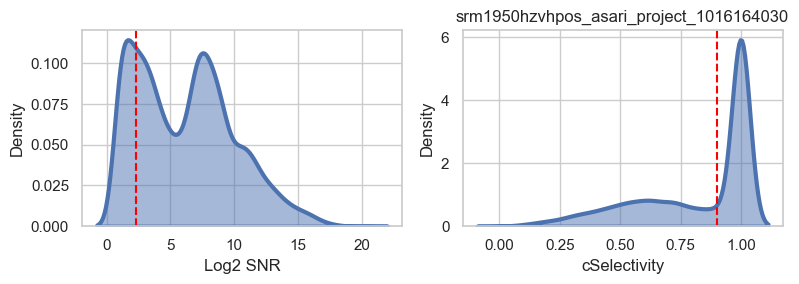

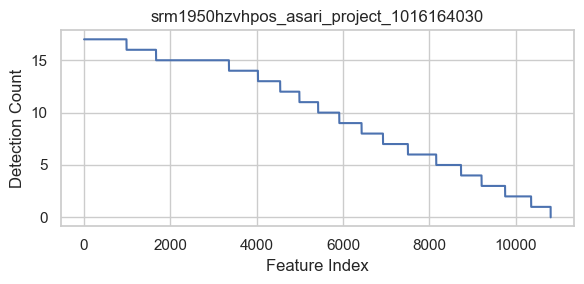

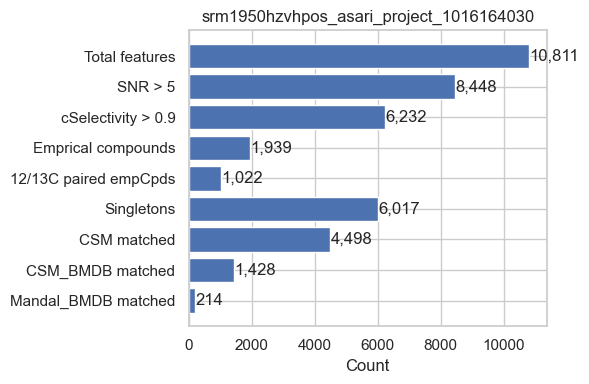

In [22]:
stats_result = {}
indir, outdir = '', 'csm_hzv029/'
for f, method in [(infile, 'hilicpos')]:
    _fname_handle_ = os.path.split(f.replace('/export/full_Feature_table.tsv', ''))[1]
    outfile = outdir + 'csmf_anno_' + _fname_handle_ + '.tsv'

    mode='pos'
    adduct_search_patterns=adduct_search_patterns_pos
    # dict_member_size = pos_dict_member_size
    if 'neg' in method:
        mode = 'neg'
        adduct_search_patterns=adduct_search_patterns_neg
        # dict_member_size = neg_dict_member_size
    
    anno, header, epdlist, list_features = annotate3_asari_table_by_csm(
                        indir + f, 
                        KCD_formula_coordinate, 
                        isotope_search_patterns,
                        adduct_search_patterns,
                        extended_adducts,
                        # dict_member_size=dict_member_size,
                        mode = mode, 
                        # method=method,
                        mz_tolerance_ppm=5, rt_tolerance=2,
                        bmDict=bmDict,
                        reflib= csmlib_dict[method], 
                        neuDict=neuCSM,
                        outfile=outfile,
                        sep='\t',
                        quality_filter=False
    )
    write3_anno_csmf_format(anno, header, outfile)
    plot_qc_(list_features, _fname_handle_, outfile=outfile.replace('.tsv', '_qc.pdf'))

    plot_missing_data_points(list_features, _fname_handle_, outfile=outfile.replace('.tsv', '_missing_data.pdf'))
    
    # Not doing this now, as problems arise 1) getting neutral mass on singletons; dealing with isomers
    # CSM match is much better approach
    # neu_mass_list = [x['neuMR_ID'] for x in anno.values()]
    # neu_mass_list = [float(x.split('_')[2]) for x in set(neu_mass_list)]
    # Mandal2025_matched = count_expected_neumass(neu_mass_list, srm_hmdb922)
    
    # write stats per file
    num_features = len(list_features)
    num_good_features = len([f for f in list_features if f['snr']>5])
    num_csel_9 = len([f for f in list_features if float(f['cSelectivity'])>0.9])
    khipus = [p for p in epdlist if len(p['MS1_pseudo_Spectra'])>1]
    num_khipus = len(khipus)
    num_singletons = len(epdlist) - num_khipus
    # updated method, matching adducts here
    isopair_empCpds = filter_isopair_khipus(khipus)
    num_csm_matched = len(anno)
    num_bmdb_matched = len([x for x in anno.values() if x['top3']])
    Wishart_overlap = count_bmdb_ids(anno, srm_hmdb_subset706.keys())
    
    header = ['Total features',
                'SNR > 5',
                'cSelectivity > 0.9',
                'Emprical compounds',
                '12/13C paired empCpds',
                'Singletons',
                'CSM matched',
                'CSM_BMDB matched', 
                # 'Mandal2025 matched',
                'Mandal_BMDB matched',
                ]
    
    # match to header sequence
    this_counts = [num_features, num_good_features, num_csel_9, 
                   num_khipus, len(isopair_empCpds), num_singletons, 
                   num_csm_matched, num_bmdb_matched, 
                   # Mandal2025_matched, 
                   Wishart_overlap,
                 ]
    
    stats_result[_fname_handle_] = dict(zip(header, this_counts))
    barplot_stats(header, this_counts, _fname_handle_, out=outfile.replace('.tsv', '_barplot.pdf'))

    # Export stats
    with open(outfile.replace('.tsv', '_stats.json'), 'w') as O:
        json.dump(stats_result, O, indent=4)


In [23]:
stats_result

{'srm1950hzvhpos_asari_project_1016164030': {'Total features': 10811,
  'SNR > 5': 8448,
  'cSelectivity > 0.9': 6232,
  'Emprical compounds': 1939,
  '12/13C paired empCpds': 1022,
  'Singletons': 6017,
  'CSM matched': 4498,
  'CSM_BMDB matched': 1428,
  'Mandal_BMDB matched': 214}}

## Overlap with Mandal et al and with CSM

out of '12/13C paired empCpds': 1022

In [24]:
srm_hmdb_subset706['MDB0000015r1']

{'inchikey': 'RJKFOVLPORLFTN-LEKSSAKUSA-N',
 'name': 'Progesterone',
 'chemical_formula': 'C21H30O2',
 'xlogP': 3.9,
 'BloodPaperCount': 30487,
 'smiles': '[H][C@@]12CC[C@H](C(C)=O)[C@@]1(C)CC[C@@]1([H])[C@@]2([H])CCC2=CC(=O)CC[C@]12C',
 'accession': 'HMDB0001830',
 'logp': 4.15,
 'kingdom': 'Organic compounds',
 'super_class': 'Lipids and lipid-like molecules',
 'class': 'Steroids and steroid derivatives',
 'sub_class': 'Pregnane steroids',
 'blood_conc': 0.00225,
 'id': 'MDB0000015r1',
 'monoisotopic_molecular_weight': 314.224580204,
 'RTI_RP_NORMAN': 783.54,
 'RTI_HILIC_RETIP': 58.199999999999996,
 'mz': 314.224580204}

In [25]:
isopair_empCpds[22]

'kp28_137.0477'

In [26]:
dict_khipus = {}
for khipu in khipus:
    dict_khipus[khipu['interim_id']] = khipu

In [27]:
dict_khipus['kp28_137.0477']

{'interim_id': 'kp28_137.0477',
 'neutral_formula_mass': 137.04772939037284,
 'neutral_formula': None,
 'Database_referred': [],
 'identity': [],
 'MS1_pseudo_Spectra': [{'id_number': 'F250',
   'id': 'F250',
   'mz': 139.0584,
   'rtime': 142.88,
   'apex': 142.88,
   'left_base': 141.01,
   'right_base': 144.41,
   'parent_masstrack_id': '1083',
   'peak_area': 43994536.0,
   'cSelectivity': 1.0,
   'goodness_fitting': 0.99,
   'snr': 11352.0,
   'detection_counts': 15,
   'representative_intensity': 43994536.0,
   'isotope': '13C/12C',
   'modification': 'M+H+',
   'ion_relation': '13C/12C,M+H+',
   'parent_epd_id': 'kp28_137.0477'},
  {'id_number': 'F197',
   'id': 'F197',
   'mz': 160.0369,
   'rtime': 142.88,
   'apex': 142.88,
   'left_base': 139.51,
   'right_base': 146.66,
   'parent_masstrack_id': '1585',
   'peak_area': 415446531.0,
   'cSelectivity': 1.0,
   'goodness_fitting': 0.98,
   'snr': 142701.0,
   'detection_counts': 16,
   'representative_intensity': 415446531.0,


In [28]:
# Get all 12C and 13C features from isopair_empCpds
paired_12C, paired_13C = [], []
for empCpd in isopair_empCpds:
    for feat in dict_khipus[empCpd]['MS1_pseudo_Spectra']:
        if feat['ion_relation'] == 'M0,M+H+':
            paired_12C.append(feat)
        elif feat['ion_relation'] == '13C/12C,M+H+':
            paired_13C.append(feat)

In [29]:
len(isopair_empCpds), len(paired_12C), len(paired_13C)
# not all ions are M+H+

(1022, 1011, 936)

In [30]:
features17 = [feat['id'] for feat in list_features if feat['detection_counts'] == 17]
len(features17), len([
    x for x in paired_12C if x['id'] in features17
]), len([
    x for x in paired_12C + paired_13C if x['id'] in features17
])

(983, 255, 305)

In [31]:
paired_12C[22]

{'id_number': 'F146',
 'id': 'F146',
 'mz': 138.055,
 'rtime': 107.24,
 'apex': 107.24,
 'left_base': 102.62,
 'right_base': 111.69,
 'parent_masstrack_id': '1067',
 'peak_area': 15599998.0,
 'cSelectivity': 1.0,
 'goodness_fitting': 0.98,
 'snr': 17.0,
 'detection_counts': 17,
 'representative_intensity': 15599998.0,
 'isotope': 'M0',
 'modification': 'M+H+',
 'ion_relation': 'M0,M+H+',
 'parent_epd_id': 'kp27_137.0477'}

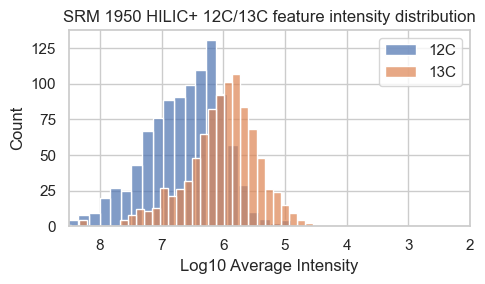

In [32]:
# distribution of average intensities
IN_12C = [np.log10(dict_all[feat['id']][1]) for feat in paired_12C]
IN_13C = [np.log10(dict_all[feat['id']][1]) for feat in paired_13C]
fig, ax = plt.subplots(figsize=(5, 3))
sns.histplot( data=IN_12C,  ax=ax, fill=True, alpha=.7, linewidth=1, label='12C')
sns.histplot( data=IN_13C, ax=ax, fill=True, alpha=.7, linewidth=1, label='13C')
ax.set_xlim(2, 8.5)
ax.invert_xaxis()
ax.set_xlabel('Log10 Average Intensity')
ax.set_ylabel('Count')
ax.set_title('SRM 1950 HILIC+ 12C/13C feature intensity distribution')
ax.legend()
plt.tight_layout()
plt.savefig('srm1950hzv_12C_13C_feature_intensity_distribution.pdf', dpi=300)

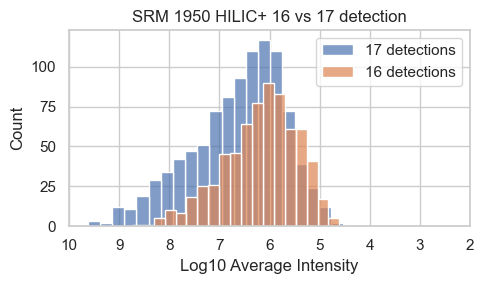

In [33]:
IN17 = [np.log10(dict_all[feat['id']][1]) for feat in list_features if feat['detection_counts'] == 17]
IN16 = [np.log10(dict_all[feat['id']][1]) for feat in list_features if feat['detection_counts'] == 16]
fig, ax = plt.subplots(figsize=(5, 3))
sns.histplot( data=IN17,  ax=ax, fill=True, alpha=.7, linewidth=1, label='17 detections')
sns.histplot( data=IN16, ax=ax, fill=True, alpha=.7, linewidth=1, label='16 detections')    
ax.set_xlim(2, 10)
ax.invert_xaxis()
ax.set_xlabel('Log10 Average Intensity')
ax.set_ylabel('Count')
ax.set_title('SRM 1950 HILIC+ 16 vs 17 detection')
ax.legend()
plt.tight_layout()
plt.savefig('srm1950hzv_16_vs_17_detection_feature_intensity_distribution.pdf', dpi=300)

## To do m/z matching to HMDB and Mandal

By 1000 bins

The compounds reported by Mandal et al (2025) on NIST SRM 1950 are used here to compare annotation. 
The report contains 922 HMDB entries. 


In [36]:
# get lists of neutral masses from Mandal2025 

def fix_id(x):
    '''len('HMDB0242636') != len('HMDB00505')'''
    x = x.strip()  # two have white space
    if len(x) == 11:
        return x
    elif len(x) == 9:
        # print(x)
        return x.replace('HMDB', 'HMDB00')
    else:
        print("Error, ", x)
        
wishart = pd.read_csv('unicode-srm1950-data.csv') # load Mandal2025 data
srmdict_hmdb = {}
for ii in wishart.iterrows():
    line = ii[1]
    iid = fix_id(line['hmdb_id'])
    srmdict_hmdb[iid] = {
        'id': iid,
        'name': line['metabolite_name'],
        'smiles': line['smiles'],
        'mono_mass': line['mono_mass'],
        'concentration': line['concentration'],
        'classification': line['classification']
    }
    
len(srmdict_hmdb), srmdict_hmdb['HMDB0000669']    

(922,
 {'id': 'HMDB0000669',
  'name': '2-Hydroxyphenylacetic acid',
  'smiles': 'OC(=O)CC1=C(O)C=CC=C1',
  'mono_mass': 152.0473441,
  'concentration': '0.078 ± 0.064',
  'classification': 'Benzene and substituted derivatives'})

In [43]:
list_mandal = []
for k, cpd in srmdict_hmdb.items():
    if cpd['mono_mass']:
        list_mandal.append({
            'id': cpd['id'],
            'mz': cpd['mono_mass'],
            'rtime': 0,
        })
len(list_mandal)

922

In [40]:
hmdb = '/Users/lish/li.proj/Resources/HMDB-5/parsed_hmdb_metabolites.tsv'    
# condense to formula and monoisotopic mass only
def get_list_from_hmdb_parsed(hmdb):
    hmdb = open(hmdb).readlines()                                                                                    
    header = hmdb[0].split('\t')   

    hdict = {}
    for line in hmdb[1:]:
        a = line.split('\t')
        if a[3].strip():
            hdict[a[0]] = a
            
    missing = []
    massDict_hmdb = {}
    h2 = [x.split('\t')[0] for x in hmdb[1:]]             
    for x in h2:  
        try: 
            a = hdict[x]  
            k = a[2]+ '_' + str(round(float(a[3]),6))  
            if k in massDict_hmdb:  
                massDict_hmdb[k].append( a[:2] )  
            else:  
                massDict_hmdb[k] = [a[:2]]  
        except KeyError: 
            missing.append(x) 
            
    len(massDict_hmdb), len(missing)

    list_hmdb5 = []
    for k in massDict_hmdb.keys():
        formula, nm = k.split('_')
        list_hmdb5.append({
            'id': formula,
            'mz': float(nm),
            'rtime': 0,
        })
    return list_hmdb5

list_hmdb5 = get_list_from_hmdb_parsed(hmdb)
len(list_hmdb5)

23245

In [41]:
# humanGEM 
M = json.load(open('/Users/lish/li.proj/ipsc_atlas/metabolicModel_az_HumanGEM_20220302_noCompartmentalization.json'))

list_gem = []
for x in M['list_of_compounds']:
    if x['neutral_mono_mass']:
        list_gem.append({
            'id': x['id'],
            'mz': x['neutral_mono_mass'],
            'rtime': 0,
        })
len(list_gem)

3384

In [38]:
# feature to khipu
f2epds = {}
for khipu in khipus:
    for feat in khipu['MS1_pseudo_Spectra']:
        f2epds[feat['id']] = khipu
        
sorted_features = sorted(list_features, key=lambda x: x['representative_intensity'], reverse=True)

In [48]:
def get_neumassList(features):
    neuList = []
    for feat in features:
        if feat['id'] in f2epds:
            neuList.append(
                {
                    'id': feat['id'],
                    'mz': f2epds[feat['id']]['neutral_formula_mass'],
                    'rtime': 0,
                }
            )
    return neuList

In [49]:
# get intensity bins
srmbins = []
for ii in range(10):
    neuList = get_neumassList(sorted_features[ii*1000: (ii+1)*1000])
    print(len(neuList))
    srmbins.append(neuList)
    

884
682
533
461
398
336
358
317
303
315


In [51]:
for ii in range(3):
    print(len())

Of 884 list1 features, number of uni-direction matched features is 527.
527
Of 682 list1 features, number of uni-direction matched features is 310.
310
Of 533 list1 features, number of uni-direction matched features is 237.
237


In [52]:
binmatches_hmdb5 = [mf.list_match_lcms_features(srmbins[ii], 
                        list_hmdb5, mz_ppm=5, rt_tolerance=1e20) for ii in range(10)]
binmatches_gem = [mf.list_match_lcms_features(srmbins[ii], 
                        list_gem, mz_ppm=5, rt_tolerance=1e20) for ii in range(10)]
binmatches_mandal = [mf.list_match_lcms_features(srmbins[ii], 
                        list_mandal, mz_ppm=5, rt_tolerance=1e20) for ii in range(10)]

Of 884 list1 features, number of uni-direction matched features is 527.
Of 682 list1 features, number of uni-direction matched features is 310.
Of 533 list1 features, number of uni-direction matched features is 237.
Of 461 list1 features, number of uni-direction matched features is 185.
Of 398 list1 features, number of uni-direction matched features is 151.
Of 336 list1 features, number of uni-direction matched features is 113.
Of 358 list1 features, number of uni-direction matched features is 124.
Of 317 list1 features, number of uni-direction matched features is 119.
Of 303 list1 features, number of uni-direction matched features is 104.
Of 315 list1 features, number of uni-direction matched features is 125.
Of 884 list1 features, number of uni-direction matched features is 188.
Of 682 list1 features, number of uni-direction matched features is 80.
Of 533 list1 features, number of uni-direction matched features is 58.
Of 461 list1 features, number of uni-direction matched features is

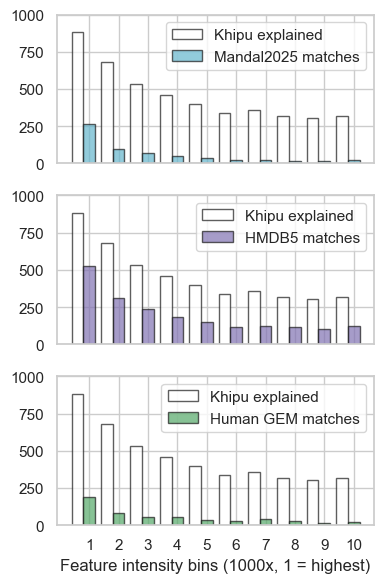

In [72]:
xticks = range(1, 11)
# barplots
fig, ax = plt.subplots(3, 1, figsize=(4, 6), sharex=True)
ax[0].bar([x-0.4 for x in xticks], [len(x) for x in srmbins], 
          color='w', alpha=0.7, edgecolor='k', width=0.4)
ax[0].bar(xticks, [len(binmatches_mandal[ii]) for ii in range(10)], 
          color='c', alpha=0.7, edgecolor='k', width=0.4)
ax[0].set_xticks(xticks)
ax[0].set_ylim(0, 1000)
ax[0].legend(loc='upper right', labels=['Khipu explained', 'Mandal2025 matches'])
ax[1].bar([x-0.4 for x in xticks], [len(x) for x in srmbins], 
          color='w', alpha=0.7, edgecolor='k', width=0.4)
ax[1].bar(xticks, [len(binmatches_hmdb5[ii]) for ii in range(10)], color='m', alpha=0.7, edgecolor='k', width=0.4)
ax[1].set_xticks(xticks)
ax[1].set_ylim(0, 1000)
ax[1].legend(loc='upper right', labels=['Khipu explained', 'HMDB5 matches'])
ax[2].bar([x-0.4 for x in xticks], [len(x) for x in srmbins], 
          color='w', alpha=0.7, edgecolor='k', width=0.4)
ax[2].bar(xticks, [len(binmatches_gem[ii]) for ii in range(10)], color='g', alpha=0.7, edgecolor='k', width=0.4)
ax[2].set_xticks(xticks)
ax[2].set_xlabel('Feature intensity bins (1000x, 1 = highest)')
ax[2].set_ylim(0, 1000)
ax[2].legend(loc='upper right', labels=['Khipu explained', 'Human GEM matches'])
plt.tight_layout()
plt.savefig('srm1950hzv_feature_intensity_bins_3anno_counts.pdf', dpi=300)

In [60]:
[len(binmatches_mandal[ii]) for ii in range(10)]

[267, 98, 67, 50, 35, 23, 26, 19, 14, 24]

**Run same for frequency bins**

In [77]:
freqbins = []
for ii in range(17, 7, -1):
    neuList = get_neumassList(
        [feat for feat in list_features if feat['detection_counts'] == ii]
    )
    freqbins.append(neuList)

In [78]:
freqbinmatches_hmdb5 = [mf.list_match_lcms_features(freqbins[ii], 
                        list_hmdb5, mz_ppm=5, rt_tolerance=1e20) for ii in range(10)]
freqbinmatches_gem = [mf.list_match_lcms_features(freqbins[ii], 
                        list_gem, mz_ppm=5, rt_tolerance=1e20) for ii in range(10)]
freqbinmatches_mandal = [mf.list_match_lcms_features(freqbins[ii], 
                        list_mandal, mz_ppm=5, rt_tolerance=1e20) for ii in range(10)]

Of 629 list1 features, number of uni-direction matched features is 348.
Of 340 list1 features, number of uni-direction matched features is 145.
Of 981 list1 features, number of uni-direction matched features is 613.
Of 325 list1 features, number of uni-direction matched features is 152.
Of 202 list1 features, number of uni-direction matched features is 71.
Of 180 list1 features, number of uni-direction matched features is 68.
Of 167 list1 features, number of uni-direction matched features is 59.
Of 172 list1 features, number of uni-direction matched features is 60.
Of 185 list1 features, number of uni-direction matched features is 65.
Of 177 list1 features, number of uni-direction matched features is 77.
Of 629 list1 features, number of uni-direction matched features is 107.
Of 340 list1 features, number of uni-direction matched features is 36.
Of 981 list1 features, number of uni-direction matched features is 192.
Of 325 list1 features, number of uni-direction matched features is 47.


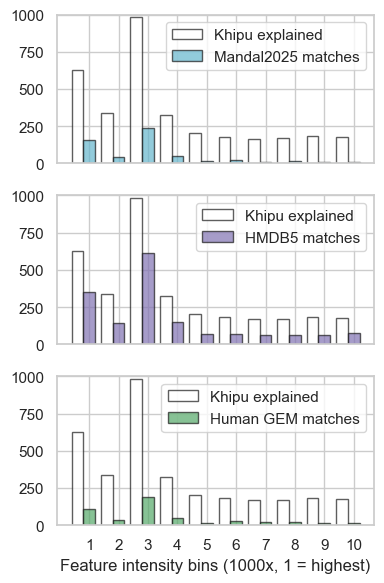

In [79]:
xticks = range(1, 11)
# barplots
fig, ax = plt.subplots(3, 1, figsize=(4, 6), sharex=True)
ax[0].bar([x-0.4 for x in xticks], [len(x) for x in freqbins], 
          color='w', alpha=0.7, edgecolor='k', width=0.4)
ax[0].bar(xticks, [len(freqbinmatches_mandal[ii]) for ii in range(10)], 
          color='c', alpha=0.7, edgecolor='k', width=0.4)
ax[0].set_xticks(xticks)
ax[0].set_ylim(0, 1000)
ax[0].legend(loc='upper right', labels=['Khipu explained', 'Mandal2025 matches'])
ax[1].bar([x-0.4 for x in xticks], [len(x) for x in freqbins], 
          color='w', alpha=0.7, edgecolor='k', width=0.4)
ax[1].bar(xticks, [len(freqbinmatches_hmdb5[ii]) for ii in range(10)], color='m', alpha=0.7, edgecolor='k', width=0.4)
ax[1].set_xticks(xticks)
ax[1].set_ylim(0, 1000)
ax[1].legend(loc='upper right', labels=['Khipu explained', 'HMDB5 matches'])
ax[2].bar([x-0.4 for x in xticks], [len(x) for x in freqbins], 
          color='w', alpha=0.7, edgecolor='k', width=0.4)
ax[2].bar(xticks, [len(freqbinmatches_gem[ii]) for ii in range(10)], color='g', alpha=0.7, edgecolor='k', width=0.4)
ax[2].set_xticks(xticks)
ax[2].set_xlabel('Feature intensity bins (1000x, 1 = highest)')
ax[2].set_ylim(0, 1000)
ax[2].legend(loc='upper right', labels=['Khipu explained', 'Human GEM matches'])
plt.tight_layout()
plt.savefig('srm1950hzv_feature_intensity_frequency_bins_3anno_counts.pdf', dpi=300)

# Conclusion

Finished v3 analysis on the SRM 1950 HZV dataset.

- High quality and reproducible features are a small subset of untargeted LC-MS data.
- Of top 1000 features by intensity, 884 are explained by khipu; 267 matched to Mandal et al 2025 annotation of SRM 1950. 
